In [1]:
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling
import pandas as pd

In [2]:
foods_binary = np.random.randint(2, size=(100, 10)) #initial dataset
print(foods_binary.shape)


(100, 10)


In [3]:
dis_matrix = pairwise_distances(foods_binary, metric = 'jaccard')
print(dis_matrix.shape)
print(dis_matrix)

(100, 100)
[[0.         0.875      0.375      ... 0.66666667 0.8        0.625     ]
 [0.875      0.         0.75       ... 0.875      0.71428571 0.85714286]
 [0.375      0.75       0.         ... 0.7        0.55555556 0.8       ]
 ...
 [0.66666667 0.875      0.7        ... 0.         0.5        0.42857143]
 [0.8        0.71428571 0.55555556 ... 0.5        0.         0.77777778]
 [0.625      0.85714286 0.8        ... 0.42857143 0.77777778 0.        ]]


/Users/quinncunningham/miniconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


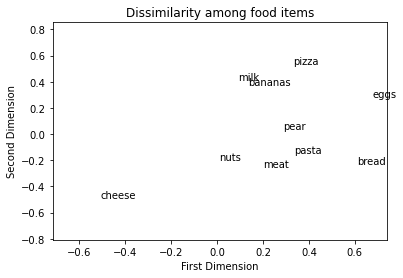

In [4]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix)  
mds_coords = mds_model.fit_transform(dis_matrix) 
                                                                                                                                  
food_names = ['pasta', 'pizza', 'meat', 'eggs', 'cheese', 'bananas', 'pear', 'bread', 'nuts', 'milk']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among food items')    
plt.show()

In [5]:
# Tura, Soga, Kenyi
dis_matrix2 = [[0,.58, .58],[.58,0,.12],[.58,.12,0]]
print(dis_matrix2)

[[0, 0.58, 0.58], [0.58, 0, 0.12], [0.58, 0.12, 0]]


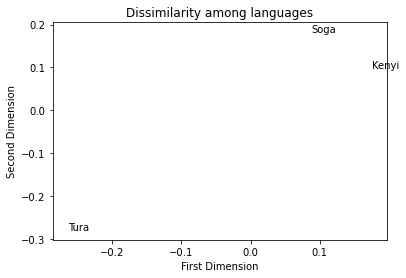

In [6]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix2)  
mds_coords = mds_model.fit_transform(dis_matrix2) 
                                                                                                                                  
names = ['Tura','Soga','Kenyi']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among languages')    
plt.show()

In [8]:
import math
print(.58**2)
print(.12**2)
dis_matrix3 = [[0,.3364,.3364],[.3364,0,.0144],[.3364,.0144,0]]

0.3364
0.0144


Tura -0.152550810702057 -0.16427850575945074
Soga 0.07055414166333981 0.08746288449505854
Kenyi 0.08199666903871716 0.07681562126439218
[[-0.152550810702057, -0.16427850575945074], [0.07055414166333981, 0.08746288449505854], [0.08199666903871716, 0.07681562126439218]]


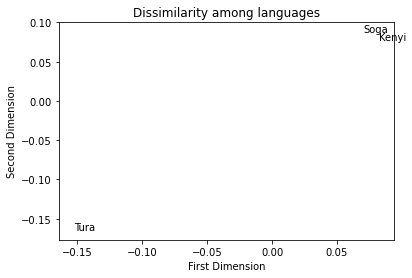

In [44]:
mds_model = manifold.MDS(n_components = 2, metric = True, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix3)  
mds_coords = mds_model.fit_transform(dis_matrix3) 
                                                                                                                                  
names = ['Tura','Soga','Kenyi']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = names
mds_list = []
lang_list = []
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    print(label,x,y)
    mds_list.append([x,y])
    lang_list.append(label)
print(mds_list)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among languages')    
plt.show()

In [45]:
X_principal = pd.DataFrame(mds_list, columns = ['P1', 'P2'], index = lang_list )
X_principal.head()

,P1,P2
Tura,-0.152551,-0.164279
Soga,0.070554,0.087463
Kenyi,0.081997,0.076816


In [23]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [52]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)


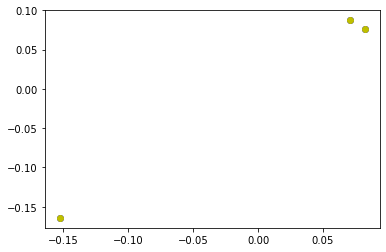

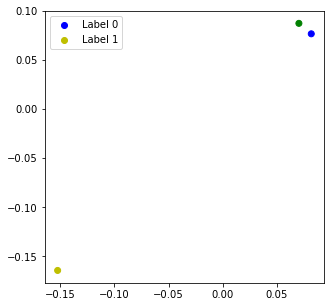

In [51]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');

    
plt.figure(figsize =(5, 5))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()


In [55]:
LTBW_dis = [[0, (1-7/17)**3,(1-6/17)**3,(1-10/17)**3],[(1-7/17)**3,0,(1-9/17)**3,(1-7/17)**3],
       [(1-6/17)**3,(1-9/17)**3,0,(1-6/17)**3], [(1-10/17)**3, (1-7/17)**3, (1-6/17)**3,0]]

[[0.0922617852133016, -0.07890131297994891], [-0.09213312530205751, -0.004875767562807253], [-0.11910711409740188, 0.09754709231002238], [0.1189784541861578, -0.013770011767266218]]
['Logoori', 'Tiriki', 'Bukusu', 'Wanga']


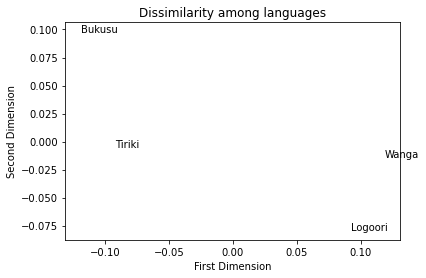

In [56]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(LTBW_dis)  
mds_coords = mds_model.fit_transform(LTBW_dis) 
                                                                                                                                  
names = ['Logoori','Tiriki','Bukusu','Wanga']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = names
mds_list = []
lang_list = []
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    mds_list.append([x,y])
    lang_list.append(label)
print(mds_list)
print(lang_list)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among languages')    
plt.show()

In [57]:
X_mds = pd.DataFrame(mds_list, columns = ['P1', 'P2'], index = lang_list )
X_mds.head()

,P1,P2
Logoori,0.092262,-0.078901
Tiriki,-0.092133,-0.004876
Bukusu,-0.119107,0.097547
Wanga,0.118978,-0.013770


In [42]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_mds)

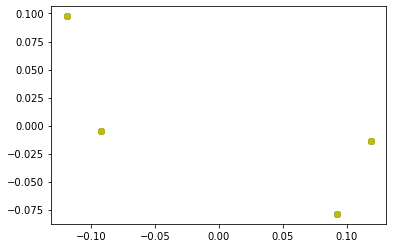

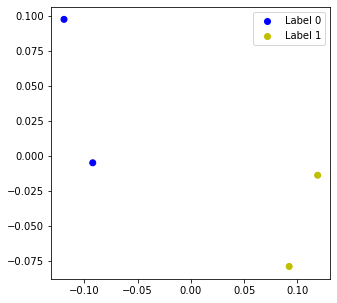

In [43]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot

b = plt.scatter(X_mds['P1'], X_mds['P2'], color ='b');
y = plt.scatter(X_mds['P1'], X_mds['P2'], color ='y');

plt.figure(figsize =(5, 5))
plt.scatter(X_mds['P1'], X_mds['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

